<a href="https://colab.research.google.com/github/Audrey-ai/Test-for-hypothyroidism-of-patients-by-Nairobi-Hospital/blob/main/Test_for_hypothyroidism_by_Nairobi_Hospital_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

###a) Specification of Data Analytical Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The main aim for our research would be to use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

###b) Determining the metric for success

The research will be considered a success if we are able to successfully build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### c) Understanding the context

Hypothyroidism is a condition in which the thyroid gland doesn't produce enough thyroid hormone.Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.Treatment consists of thyroid hormone replacement.


For our reaserch, we have this dataset from Nairobi hospital with a number of variables that determine if one has hypothyroidism or not and our aim is to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.The two main algorithms we are going to use is Decision trees and Support Vector Machine(SVM) and as part of our reserch we will be able to tell which symptoms most influence hypothyroidism.

### d) Recording the Experimental Design


Experimental design refers to how participants are allocated to the different conditions in a reaserch or experiment.
The experimental design used is **Independent measures design**, also known as between-groups,which is an experimental design where different participants are used in each condition of the independent variable.  This means that each condition of the experiment includes a different group of participants.

###e) Data Relevance

The datasets we are using in our reaserch are relevant as it contains information on symptoms that indicate hypothyroidism and this would play a major role in attaining our goal of building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.In general the variables selected for the dataset present a high degree of data relevance.

#2. Reading and Checking of data

In [ ]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
#Loading the dataset to use in our research
#

Data = pd.read_csv('hypothyroid.csv', na_values = "?")
Data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN


In [ ]:
#Checking the shape of the dataset
Data.shape

(3163, 26)

In [ ]:
#Checking column information

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [ ]:
#Checking number of unique values per column
#
Data.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

#3. Data Cleaning

In [ ]:
#Checking the TBG column count with unkwown values(question marks)
#

Data['TBG'].isnull().sum()  #There are 2903  null values thus it would be wise to drop the column

2903

In [ ]:
#Dropping the TBG column
#
Data.drop(['TBG'], axis=1, inplace=True)
Data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [ ]:
#Checking for missing values

Data.isnull().sum()  #There is missing data


status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

In [ ]:
#Filling in mean values for null values in our dataframe for continuous variables

Int = ['age','TSH','T3','TT4','T4U','FTI']
Data[Int] = Data[Int].fillna((Data[Int].mean()))


#Dealing with missing values in the sex column(categorical column)

Data['sex'].fillna(method='ffill', inplace=True)

Data.isnull().sum()

#There is no more missing data

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [ ]:
#Checking for duplicates

Data.duplicated().any()  #There are duplicated values

#Dropping duplicate entries
Data.drop_duplicates(inplace=True)

#Checking the shape of the remaining data
Data.shape

(3007, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<function matplotlib.pyplot.show>

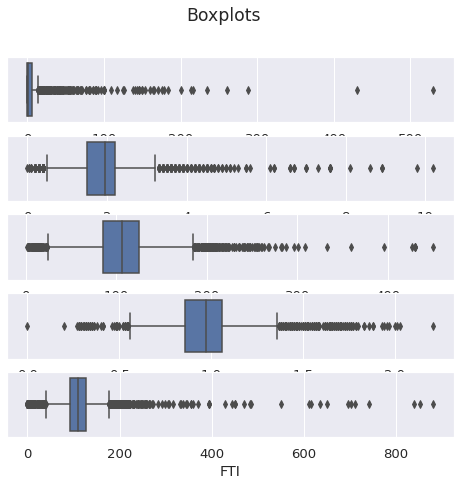

In [ ]:
#Checking for outliers and anomalies
#

variables = ['TSH','T3','TT4','T4U','FTI']

fig, ax = plt.subplots(len(variables), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(variables):
  sns.boxplot(Data[col_val],ax=ax[i])

plt.show

#4. Exploratory Data Analysis

#4.a)Univariate data analysis

In [ ]:
#Creating frequency tables for categorical columns

variables = ['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
             'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
             'tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured',
             'FTI_measured','TBG_measured']

for variable in variables:
 print(variable)
 print(Data[variable].value_counts())

 

 #From the frequenct table below we note some of the following:
 #1. Most individuals sampled did not have hypothyroidism
 #2. Most individuals were female
 #3. Most individuals were not on thyroxine  or antithyroid medication

status
negative       2866
hypothyroid     141
Name: status, dtype: int64
sex
F    2098
M     909
Name: sex, dtype: int64
on_thyroxine
f    2561
t     446
Name: on_thyroxine, dtype: int64
query_on_thyroxine
f    2952
t      55
Name: query_on_thyroxine, dtype: int64
on_antithyroid_medication
f    2965
t      42
Name: on_antithyroid_medication, dtype: int64
thyroid_surgery
f    2904
t     103
Name: thyroid_surgery, dtype: int64
query_hypothyroid
f    2772
t     235
Name: query_hypothyroid, dtype: int64
query_hyperthyroid
f    2780
t     227
Name: query_hyperthyroid, dtype: int64
pregnant
f    2946
t      61
Name: pregnant, dtype: int64
sick
f    2910
t      97
Name: sick, dtype: int64
tumor
f    2967
t      40
Name: tumor, dtype: int64
lithium
f    3005
t       2
Name: lithium, dtype: int64
goitre
f    2912
t      95
Name: goitre, dtype: int64
TSH_measured
y    2631
n     376
Name: TSH_measured, dtype: int64
T3_measured
y    2406
n     601
Name: T3_measured, dtype: int64
TT4_measured
y  

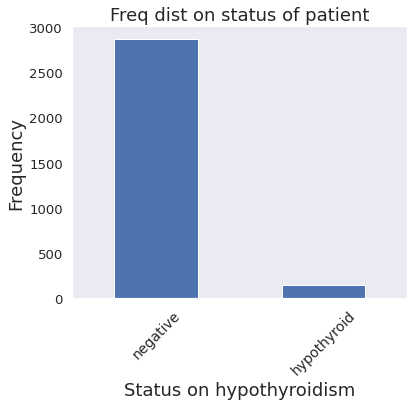

In [ ]:
#Displaying whether or not the patients have hypothyroidism
#
#Bar plot on status

Data['status'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on status of patient',size=18)
plt.xlabel('Status on hypothyroidism',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()


#From the plot below you can see most  patients do not have hypothyroidism

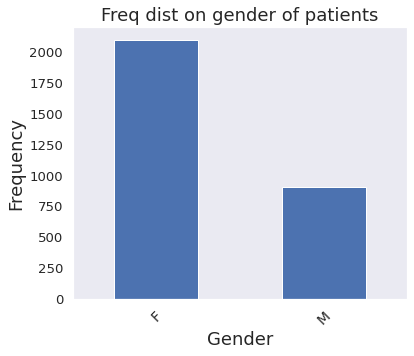

In [ ]:
#Displaying the gender for most patients
#
#Bar plot on gender

Data['sex'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on gender of patients',size=18)
plt.xlabel('Gender',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()


#From the plot below you can see most  patients sampled were females

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution on age')

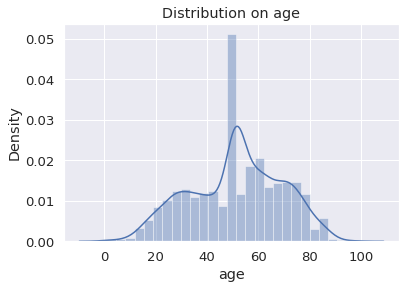

In [ ]:
#Checking the age distribution
#
#Plotting the distribution

sns.distplot(Data['age'])
plt.title('Distribution on age')


#Majority of the respondents is between 45 and 55 years.
#The distribution appears quite normal

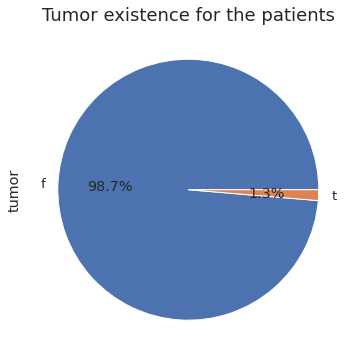

In [ ]:
#Pie chart on tumor existence for the sampled patients
#

Data['tumor'].value_counts().plot.pie(figsize=(7,6),autopct='%1.1f%%')

plt.title('Tumor existence for the patients',size=18)
plt.show()

#we can notice that  most of the patients sampled dont have tumors

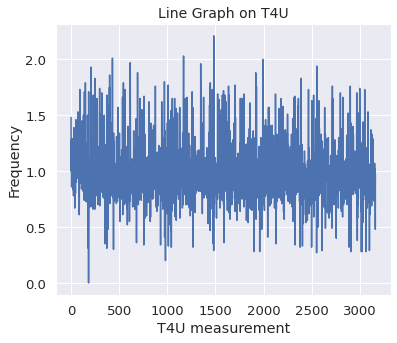

In [ ]:
#line graph on one measured variable-T4U

Data['T4U'].plot.line(figsize=(6,5))
plt.title('Line Graph on T4U',size=14)
plt.xlabel('T4U measurement')
plt.ylabel('Frequency')
plt.show()

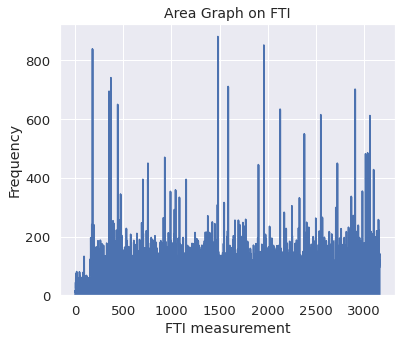

In [ ]:
#Area graph on one measured variable-FTI

Data['FTI'].plot.area(figsize=(6,5))
plt.title('Area Graph on FTI',size=14)
plt.xlabel('FTI measurement')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Desriptive Statistics on age and measurement variables

Var = ['age','TSH','TT4','T4U','FTI']

Data[Var].describe()

,age,TSH,TT4,T4U,FTI
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,5.823557,108.714583,0.977593,115.484252
std,17.864731,22.470602,43.395720,0.219705,58.535310
min,1.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,106.000000,0.970000,109.000000
75%,64.000000,5.300000,125.000000,1.060000,126.000000
max,98.000000,530.000000,450.000000,2.210000,881.000000


#4.b) Bivariate Data Analysis

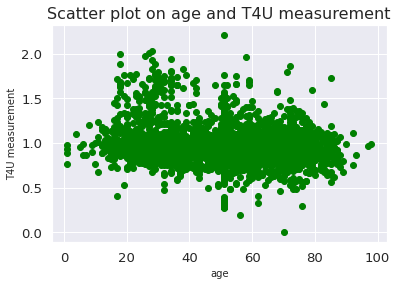

In [ ]:
##Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between age and T4U measurement
plt.scatter(Data['age'],Data['T4U'], color='Green')
plt.title('Scatter plot on age and T4U measurement',size=16)
plt.xlabel('age',size=10)
plt.ylabel('T4U measurement',size=10)
plt.show()

#There is no visible relationship between age and T4U measurement

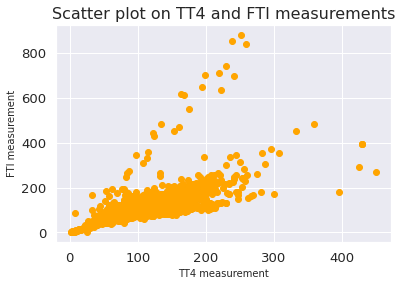

In [ ]:
##Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between TT4 and FTI  measurements
plt.scatter(Data['TT4'],Data['FTI'], color='Orange')
plt.title('Scatter plot on TT4 and FTI measurements',size=16)
plt.xlabel('TT4 measurement',size=10)
plt.ylabel('FTI measurement',size=10)
plt.show()

#There seems to be a postive relationship between TT4 and FTI measurements

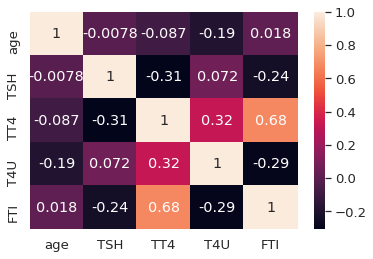

In [ ]:
#Creating the correlation heatmap
#to check the relationship among number of differents variables

sns.heatmap(Data[Var].corr(),annot=True)
plt.show()



#From the correlation heatmap below,you notice that 
#There is moderately small to no correlation among our variables 
#but TT4 and FTI measurements do exhibit a fairly moderate positive correlation between them

Text(0, 0.5, 'Number')

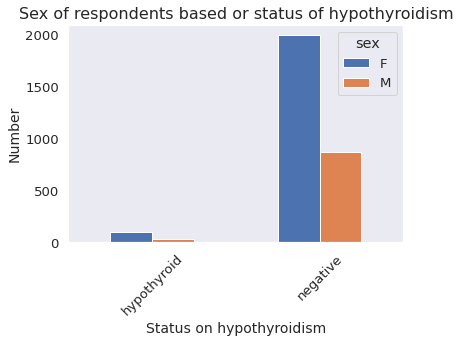

In [ ]:
#Side by side bar graph on hypothyroidism status and gender

#First grouping the dataframe by the two variables
Data.groupby(['status','sex']).count()
Data.groupby(['status','sex']).age.count().unstack()

#Plotting our bar graph 
Data.groupby(['status','sex']).age.count().unstack().plot(kind='bar',grid=False)

# labels and title
plt.title('Sex of respondents based or status of hypothyroidism',fontsize=16)
plt.xlabel('Status on hypothyroidism',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number',fontsize=14)


#We notice a high number of female patients for both hypothyroidism status
#and overall negative hypothyroidism for most patients

Text(0, 0.5, 'Number')

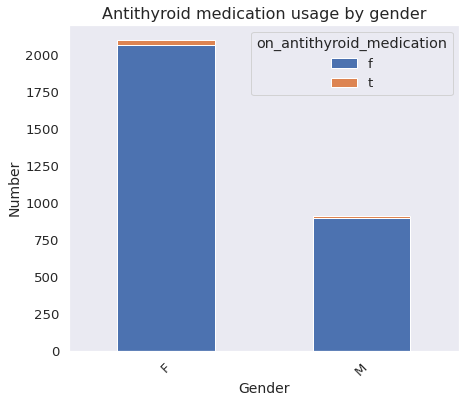

In [ ]:
#Stacked bar graph on antithyroid medication usage by gender

#First grouping the dataframe by the two variables
Data.groupby(['sex','on_antithyroid_medication']).count()
Data.groupby(['sex','on_antithyroid_medication']).age.count().unstack()

#Plotting our bar graph 
Data.groupby(['sex','on_antithyroid_medication']).age.count().unstack().plot(kind='bar',stacked=True,
                                                                             figsize=(7,6),grid=False)

# labels and title
plt.title('Antithyroid medication usage by gender',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number',fontsize=14)




#We notice most female and male  patients are not on antithyroid medication usage


#5. Encoding of Categorical Variables

In [ ]:
#Encoding our categorical columns

#First importing and instantiating labelencoder
#First importing  labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3007 non-null   object 
 1   age                        3007 non-null   float64
 2   sex                        3007 non-null   object 
 3   on_thyroxine               3007 non-null   object 
 4   query_on_thyroxine         3007 non-null   object 
 5   on_antithyroid_medication  3007 non-null   object 
 6   thyroid_surgery            3007 non-null   object 
 7   query_hypothyroid          3007 non-null   object 
 8   query_hyperthyroid         3007 non-null   object 
 9   pregnant                   3007 non-null   object 
 10  sick                       3007 non-null   object 
 11  tumor                      3007 non-null   object 
 12  lithium                    3007 non-null   object 
 13  goitre                     3007 non-null   objec

In [ ]:
#Encoding our categorical columns
#

#Categorical boolean mask
categorical_feature_mask = Data.dtypes==object

#Filter categorical columns using mask and turn it into a list
categorical_columns = Data.columns[categorical_feature_mask].tolist()

#Apply le on categorical feature columns
Data[categorical_columns] = Data[categorical_columns].apply(lambda col:le.fit_transform(col))
Data[categorical_columns].head()


,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [ ]:
#Cross checking our dataset
#
print(Data.shape)
Data.head()

(3007, 25)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [ ]:
#Resetting column index

Data.reset_index(drop=True)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,1,58.0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0
3003,1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3004,1,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3005,1,74.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0


#6. Decision Trees

#6.a) Random Forest

In [ ]:
#Preprocessing and splitting our dataset

# Split the independent and dependent variables
X = Data.drop(['status'],axis=1)
y = Data['status']


#Splitting our dataset and training using 80% of the data

#and balancing our sample selection(stratify) due to imbalanced data on patient status of hypothyroidism

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

#Training the random forest algorithm

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_predForest = forest.predict(X_test)
y_predForest

In [ ]:
#Checking on the accuracy of our model
from sklearn import metrics

accuracy_score(y_test, y_predForest)

#We can notice an accuracy score of 98.40% which shows our model exhibited a good performance

0.9840425531914894

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


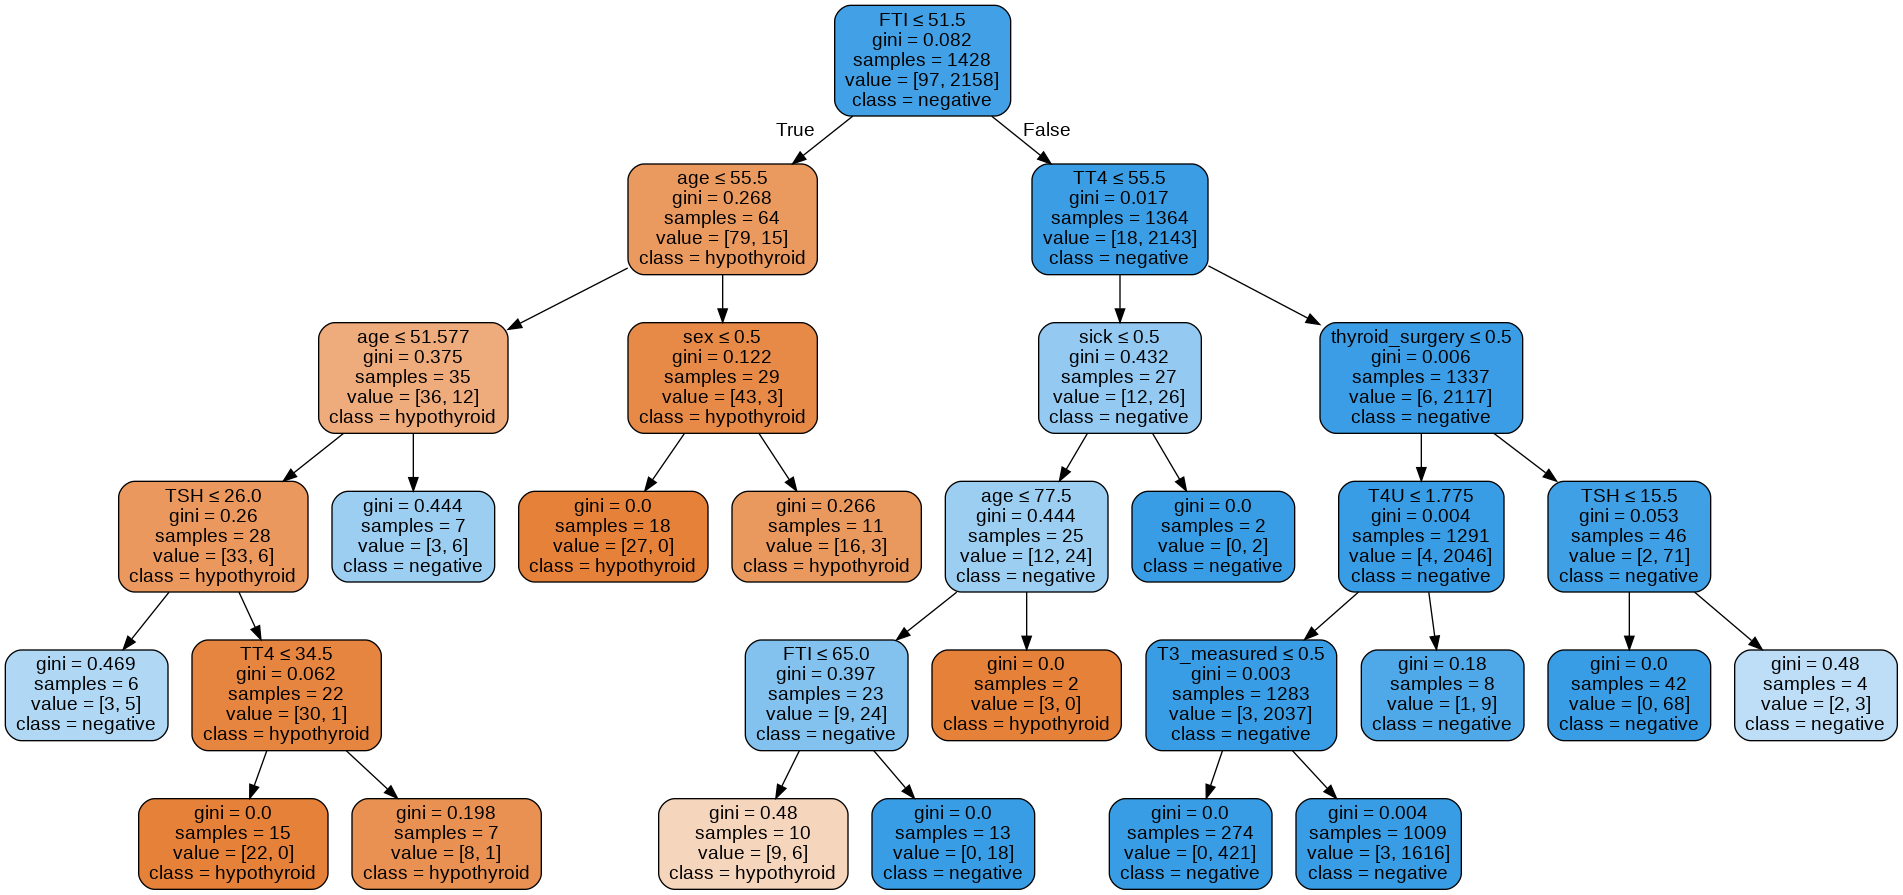

In [ ]:
#Visualizing a few of the decision trees
#In our model we have 100 trees, trying gto visualise 50 trees

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['hypothyroid','negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())



In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

#Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.05), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.04), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.05), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.85), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.85
Variable: age                  Importance: 0.05
Variable: TT4                  Importance: 0.05
Variable: TSH                  Importance: 0.04
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyr

From the above we do notice the most impactful  features in our prediction are age and FTI,TT4 and TSH measurements. Representing the above visually below:


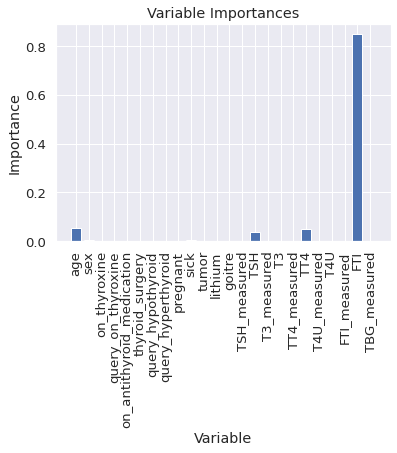

In [ ]:
# Import matplotlib 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In general based on random forest, we notice  a model accuracy score of 98.40% which shows the model did exhibit a good performance and the most impactful features in our prediction based on random forest are:age,TSH ,TT4 and FTI measurements.


Lets try create decision trees using Ada boosted and gradient boosted trees to see the impact on model performance.

#6.b) Ada boosted tree

In [ ]:
#Preprocessing and splitting our dataset

# Split the independent and dependent variables
X = Data.drop(['status'],axis=1)
y = Data['status']


#Splitting our dataset and training using 80% of the data

#and balancing our sample selection(stratify) due to imbalanced data on patient status of hypothyroidism

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

a)Ada Boost with a moderate learning rate

In [ ]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=1.0)
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred_ada1 = ada_boost.predict(X_test)
y_pred_ada1


In [ ]:
#Checking on the accuracy of our model

accuracy_score(y_test, y_pred_ada1)

#We can notice an accuracy score of 98.54% with a moderate learning rate which shows our model exhibited a good performance
#and is slightly better than random forest model

0.9853723404255319

b)Adaboost with a lower learning rate

In [ ]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost2 = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=0.5)
ada_boost2 = ada_boost2.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred_ada2 = ada_boost2.predict(X_test)
y_pred_ada2


In [ ]:
#Checking on the accuracy of our model

accuracy_score(y_test, y_pred_ada2)

#With a lower learning rate of 0.5, we do notice a better performance compared to a learning rate of 1.0

0.988031914893617

c)Adaboost with a higher learning rate

In [ ]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost3 = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=1.5)
ada_boost3 = ada_boost3.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred_ada3= ada_boost3.predict(X_test)
y_pred_ada3


In [ ]:
#Checking on the accuracy of our model

accuracy_score(y_test, y_pred_ada3)

#With a higher learning rate we do notice a slightly lower performance as compared to
#a moderate and lower learning rate

0.9827127659574468

In general the model that exhibits a better performance in terms of accuarcy is the one which has a lower learning rate of 0.5.

In [ ]:
#The best performing Adaboost model is model 2(y_pred_ada2)
#with an accuracy score of 98.80%

accuracy_score(y_test, y_pred_ada2)

0.988031914893617

In [ ]:
# Get numerical feature importances for our best model
importances = list(ada_boost2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

#Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.09), ('sex', 0.0), ('on_thyroxine', 0.05), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.25), ('T3_measured', 0.0), ('T3', 0.12), ('TT4_measured', 0.0), ('TT4', 0.18), ('T4U_measured', 0.0), ('T4U', 0.08), ('FTI_measured', 0.0), ('FTI', 0.22), ('TBG_measured', 0.0)]

Variable: TSH                  Importance: 0.25
Variable: FTI                  Importance: 0.22
Variable: TT4                  Importance: 0.18
Variable: T3                   Importance: 0.12
Variable: age                  Importance: 0.09
Variable: T4U                  Importance: 0.08
Variable: on_thyroxine         Importance: 0.05
Variable: on_antithyroid_medication Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid

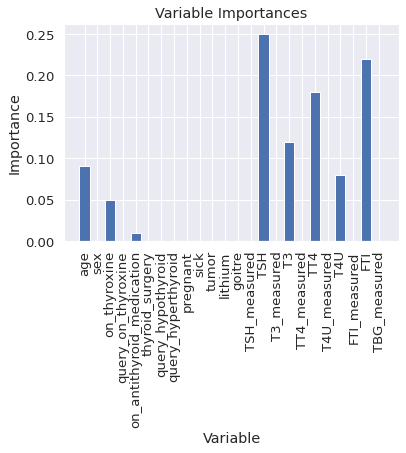

In [ ]:
# Import matplotlib 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Based on Ada Boost, the model accuracy with best performance is one with lower learning rate of 0.5 and the features which are most impactful in influencing the prediction by the model created are age,TSH,T3,TT4,T4U and FTI measurements as well as whther the patient is on throxine or on antithyroid medication.

#6.c) Gradient Boost tree

In [ ]:
#Preprocessing and splitting our dataset

# Split the independent and dependent variables
X = Data.drop(['status'],axis=1)
y = Data['status']


#Splitting our dataset and training using 80% of the data

#and balancing our sample selection(stratify) due to imbalanced data on patient status of hypothyroidism

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

a)Gradient boost with a moderate learning rate

In [ ]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

#Training the ada boost tree algorithm
target_number_of_trees = 100

gbr1 = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=1.0, max_depth=2)
gbr1 = gbr1.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_gbr1 = gbr1.predict(X_test)
y_pred_gbr1

In [ ]:
##Checking on the accuracy of our model

accuracy_score(y_test, y_pred_gbr1)

#We can notice an accuracy score of 97.47% with a moderate learning rate which shows 
#our model exhibited a good performance


0.9747340425531915

b)Gradient Boost with a lower learning rate

In [ ]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

#Training the ada boost tree algorithm
target_number_of_trees = 100

gbr2 = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.5, max_depth=4)
gbr2 = gbr2.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_gbr2 = gbr2.predict(X_test)
y_pred_gbr2

In [ ]:
##Checking on the accuracy of our model

accuracy_score(y_test, y_pred_gbr2)

#We can notice an accuracy score of 98.67% with a lower learning rate and higher max_depth which shows 
#our model exhibited a good performance tahn moderate learnong rate of 1.0

0.9867021276595744

c)Gradient Boost with a higher learning rate

In [ ]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

#Training the ada boost tree algorithm
target_number_of_trees = 100

gbr3 = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=1.5, max_depth=4)
gbr3 = gbr3.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_gbr3 = gbr3.predict(X_test)
y_pred_gbr3

In [ ]:
##Checking on the accuracy of our model

accuracy_score(y_test, y_pred_gbr3)

#We can notice an accuracy score of 98.40% with a higher learning rate which shows 
#our model exhibited a good performance than at learning rate 0f 1.0 and max_depth of 2

0.9840425531914894

In general the model that exhibits a better performance in terms of accuarcy is the one which has a lower learning rate of 0.5 that is lower than the other two models.

In [ ]:
##Checking on the accuracy of our best model

accuracy_score(y_test, y_pred_gbr2)

0.9867021276595744

In [ ]:
# Get numerical feature importances for our best model
importances = list(gbr2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

#Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.06), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.05), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.73), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.13), ('TBG_measured', 0.0)]

Variable: TT4                  Importance: 0.73
Variable: FTI                  Importance: 0.13
Variable: thyroid_surgery      Importance: 0.06
Variable: TSH                  Importance: 0.05
Variable: age                  Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypot

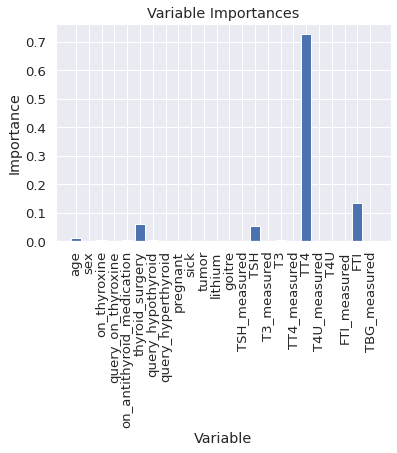

In [ ]:
# Import matplotlib 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Based on Gradient Boost, the model accuracy with best performance is one with lower learning rate of 0.5 and the features which are most impactful in influencing the prediction by the model created are age,thyroid surgery,TSH,T3,TT4 and FTI measurements.

#Summary on decision trees

In summary, the three models:Random forest(98.40%),Adaboost(98.80%), Gradient boost(98.67%) all shpow a great performance. We also notice the features taht are most impactful across all models are age and FTI,TT4,TSH measurements hpowever Adaboost trees have more significant vfeatures as compared to other models. Also for Adaboost and Gradient boost trees,a lower learning rate showcased a better performance as compared to  a higher learning rate.


The two best models I trust most are Ada Boost and Gradient Boost trees due to their exhibit of a better performance based on accuracy and have more most impactful features as compared to Random Forest.

#Support Vector Machine(SVM)

The two most impactful features to hypothyroidism that we were able to see from Decision trees is TSH and FTI. These are the two variables we will use in SVM.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


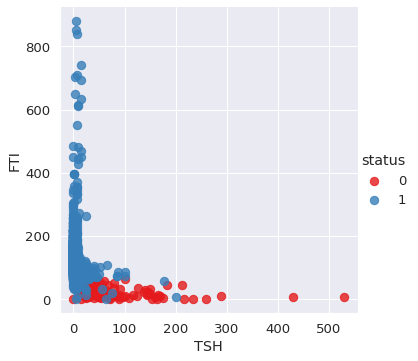

In [ ]:
#So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('TSH', 'FTI', data=Data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
#Preprocessing and splitting our dataset

X = Data[['TSH','FTI']]
y = Data['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state = 0)

#Model Fitting : Polynomial Function

In [ ]:
## Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

In [ ]:
# Get the separating hyperplane
#w = polyclassifier.coef_[0] #get the first coefficient of our model
#a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
#xx = np.linspace(30, 60)
#yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
#sns.lmplot('TSH', 'FTI', data=recipes, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
#plt.plot(xx, yy, linewidth=2, color='black');


In [ ]:
# making prediction
y_predPoly = polyclassifier.predict(X_test)
y_predPoly

In [69]:
# Model Evaluation
print( accuracy_score(y_test, y_predPoly))
print(confusion_matrix(y_test, y_predPoly))

#SVM with polynomial kernel function returns an accuracy of 98.17%

0.9817275747508306
[[ 23   5]
 [  6 568]]


#Model Fitting : Linear Function

In [ ]:
#Build the svm model 

model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_predLin = model.predict(X_test)
y_predLin

In [ ]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TSH', 'FTI', data=Data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


In [71]:
# Checking the accurancy of the model

model_accuracy = accuracy_score(y_test,y_predLin)
model_accuracy

# We've gotten a classification rate of 98.67%. This is a pretty good accuracy score 

0.9867109634551495

#Model Fitting : Radial Basis Function(rbf)

In [72]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',gamma='scale')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_predRob = rbfclassifier.predict(X_test)
y_predRob

In [74]:
# Model Evaluation
print( accuracy_score(y_test, y_predRob))
print(confusion_matrix(y_test, y_predRob))

#We've gotten a classification rate of 99.00%. This is a pretty good accuracy score 

0.9900332225913622
[[ 24   4]
 [  2 572]]


#Model Fitting : Sigmoid Model

In [75]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid', gamma='scale')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_predSig = sigclassifier.predict(X_test)
y_predSig

In [78]:
# Model Evaluation
print( accuracy_score(y_test, y_predSig))
print(confusion_matrix(y_test, y_predSig))

# We've gotten a classification rate of 95.18%. This is a pretty good accuracy score 

0.9518272425249169
[[ 11  17]
 [ 12 562]]


# Comparison of the Kernel Performance

When we compare the performance of the three kernel, it clear that sigmoid performs the worst and rbf kernel the best.


On the other hand, we can see that the rbf kernel also know as **Gaussian Kernel** achieved a 99% prediction rate and this is this kernel ives us the best model.

#Rbf Kernel Function using all features

In [86]:
#Preprocessing and splitting our dataset

# Split the independent and dependent variables
X = Data.drop(['status'],axis=1)
y = Data['status']

#Splitting our dataset and training using 80% of the data

#and balancing our sample selection(stratify) due to imbalanced data on patient status of hypothyroidism

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [87]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',gamma='scale')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_predRob1 = rbfclassifier.predict(X_test)
y_predRob1

In [90]:
# Model Evaluation
print( accuracy_score(y_test, y_predRob))
print(confusion_matrix(y_test, y_predRob))

#We've gotten a classification rate of 98.01%. This is a pretty good accuracy score 

0.9800531914893617
[[ 27   8]
 [  7 710]]


#Summary on rbf performance using two and all features

While using all features the rbf kernel performance drops a bit as compared to using only two features. It could be these two features influence the dependent variable by a big margin.

#Challenging the solution


The reaserch was a success as we could be able to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid using both Decision trees and SVM.However the results could be improved if we had more features that could help us predict the results and if the data was more balanced.

Otherwise we can note the below:


1.The data we used for our research was appropriate to achieve the results.


2.The reaserch was a success as we were able to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid using both Decision trees and SVM. 